In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter.csv')  # Replace with your dataset filename

# Display sample
df.head()


,tweet,label
0,I hate you and your stupid opinions!,1
1,What a beautiful day to spread love.,0
2,All people from that place are terrorists!,1
3,You are amazing and kind.,0
4,Those people are dirty and dangerous.,1


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_text'] = df['tweet'].apply(clean_text)


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer


stop_words = set(stopwords.words('english'))
tokenizer = TreebankWordTokenizer()

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    return " ".join([word for word in tokens if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df[['tweet', 'cleaned_text']].head()


,tweet,cleaned_text
0,I hate you and your stupid opinions!,hate stupid opinions
1,What a beautiful day to spread love.,beautiful day spread love
2,All people from that place are terrorists!,people place terrorists
3,You are amazing and kind.,amazing kind
4,Those people are dirty and dangerous.,people dirty dangerous


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_text'])  # Features
y = df['label']  # Labels (1 = Hate, 0 = Not Hate)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



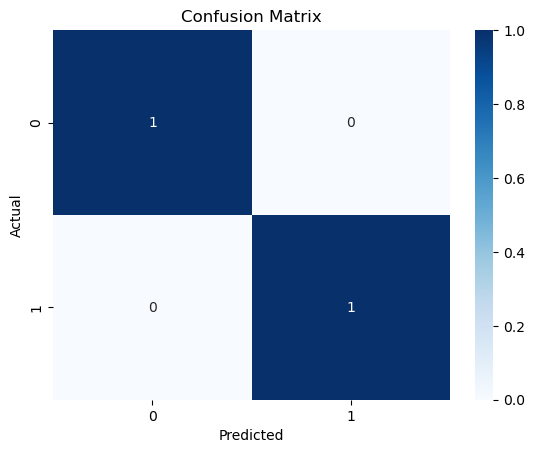

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


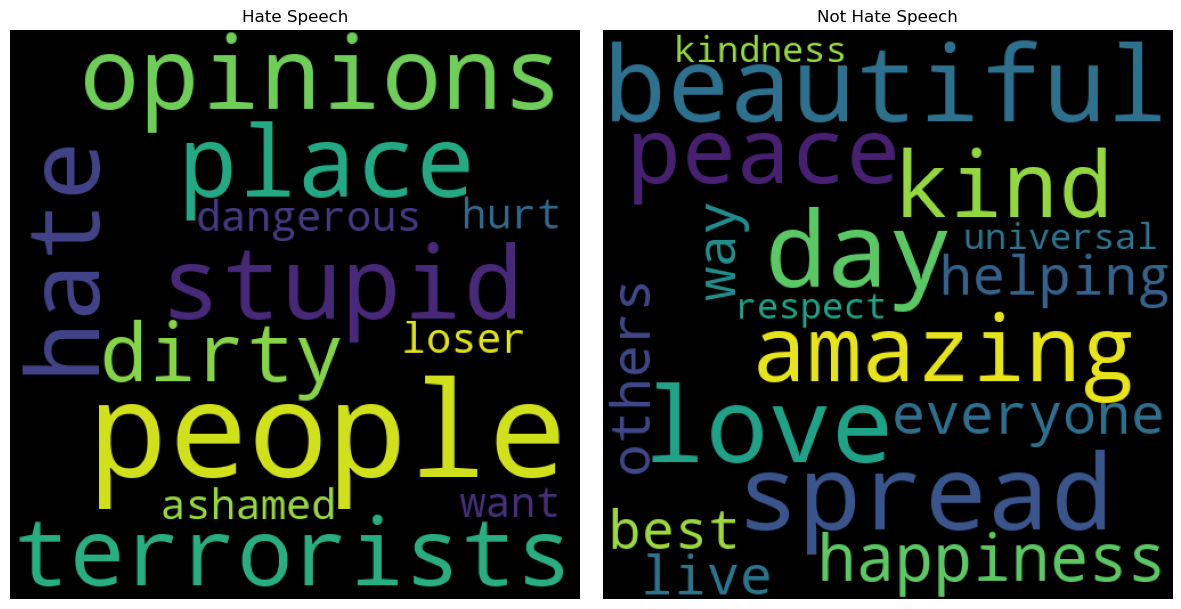

In [9]:
from wordcloud import WordCloud

# Join text
hate_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
non_hate_words = ' '.join(df[df['label'] == 0]['cleaned_text'])

# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Hate Speech")
plt.imshow(WordCloud(width=500, height=500).generate(hate_words))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Not Hate Speech")
plt.imshow(WordCloud(width=500, height=500).generate(non_hate_words))
plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

def predict_hate_speech(message):
    cleaned = preprocess_text(message)
    vectorized = tfidf.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return "⚠️ Hate Speech" if pred == 1 else "✅ Not Hate Speech"



In [13]:
print(predict_hate_speech("I hate you all and want to destroy this place."))
print(predict_hate_speech("We must build love and unity in our country."))


⚠️ Hate Speech
✅ Not Hate Speech


# 🧠 Hate Speech Detection using Machine Learning (NLP Project)

## Objective
To detect whether a tweet contains hate speech using text preprocessing and classification models.

## Tools Used
- Python, Pandas, Scikit-learn
- NLTK (for stopwords & tokenization)
- TF-IDF (for feature extraction)
- Logistic Regression (Model)

## Dataset
A labeled dataset of tweets with 0 (Not Hate) and 1 (Hate Speech).

## Process
1. Data Cleaning
2. Tokenization + Stopword Removal
3. TF-IDF Vectorization
4. Model Training (Logistic Regression)
5. Model Evaluation (Confusion Matrix, Accuracy)
6. Real-time Prediction
7. WordCloud for hate & non-hate tweets
